In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
norm_ds = xr.open_dataset("/Users/dgagne/data/hfip/processed_data_dv/hwrf_local_norm_stats.nc")

In [6]:
variables = norm_ds["variable"].values
print(variables)
print(len(variables))

['THETA_E_L100_50000' 'THETA_E_L100_70000' 'THETA_E_L100_85000'
 'U_RAD_L100_50000' 'U_RAD_L100_70000' 'U_RAD_L100_85000'
 'V_TAN_L100_50000' 'V_TAN_L100_70000' 'V_TAN_L100_85000']
9


In [7]:
norm_ds

<xarray.Dataset>
Dimensions:           (lat: 384, lon: 384, statistic: 6, variable: 9)
Coordinates:
  * variable          (variable) object 'THETA_E_L100_50000' ... 'V_TAN_L100_85000'
  * lat               (lat) int64 0 1 2 3 4 5 6 ... 377 378 379 380 381 382 383
  * lon               (lon) int64 0 1 2 3 4 5 6 ... 377 378 379 380 381 382 383
  * statistic         (statistic) object 'sum' 'sum_count' ... 'standard_dev'
Data variables:
    local_norm_stats  (variable, lat, lon, statistic) float32 ...

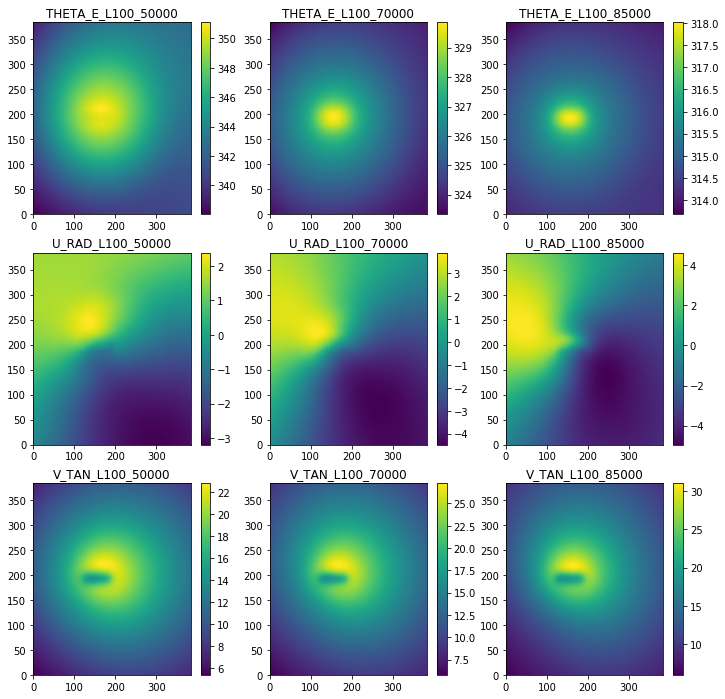

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axef = axes.ravel()
for v, var in enumerate(variables):
    pc = axef[v].pcolormesh(norm_ds["local_norm_stats"].sel(variable=var, statistic="mean"))
    plt.colorbar(pc, ax=axef[v])
    axef[v].set_title(var)

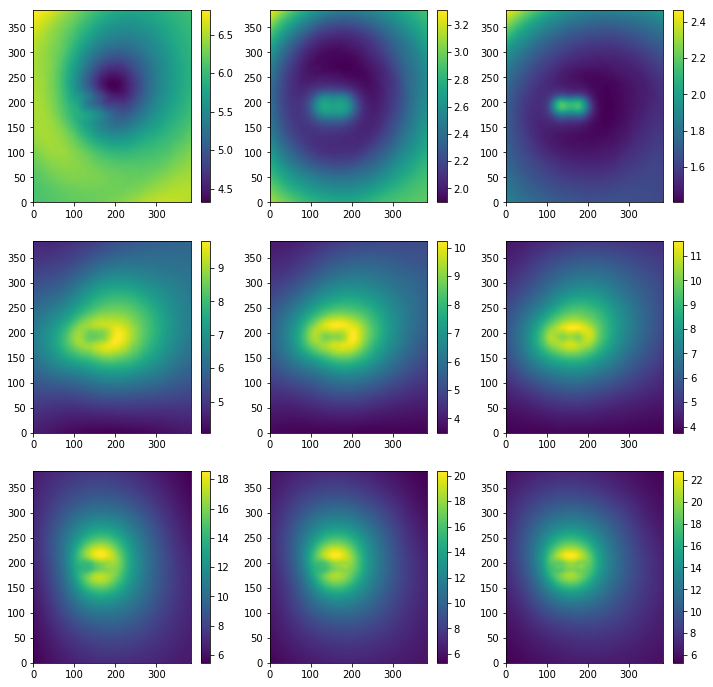

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axef = axes.ravel()
for v, var in enumerate(variables):
    pc = axef[v].pcolormesh(norm_ds["local_norm_stats"].sel(variable=var, statistic="standard_dev"))
    plt.colorbar(pc, ax=axef[v])

In [19]:
bt_data = pd.read_csv("/Users/dgagne/data/hfip/processed_data_dv/best_track_all.csv")

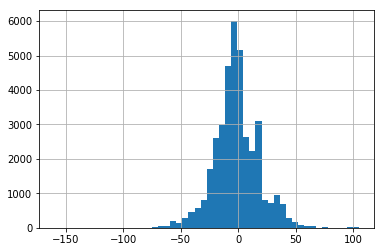

In [23]:
bt_data["dvmax_bt_24"][bt_data["dvmax_bt_24"] < 500].hist(bins=50)